# Ground Run Analysis

Edgar Hernandez

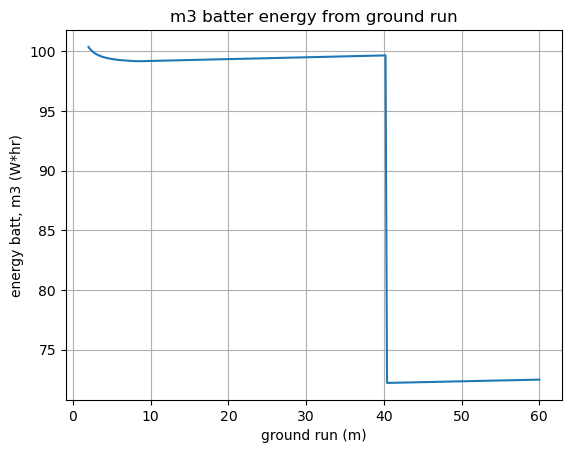

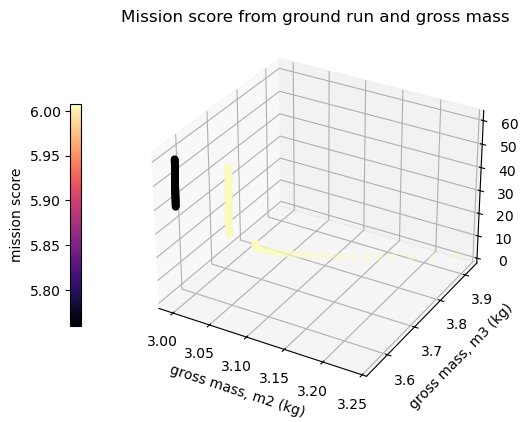

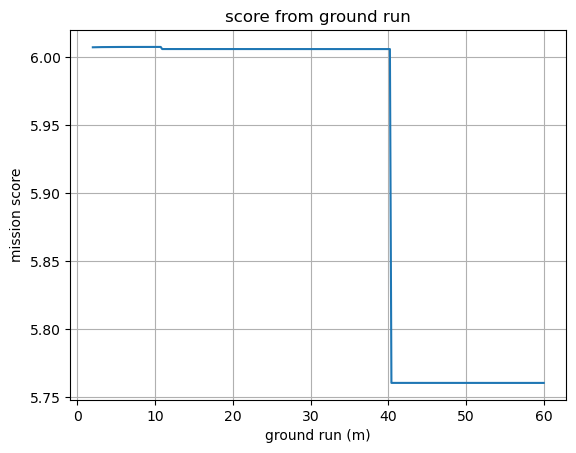

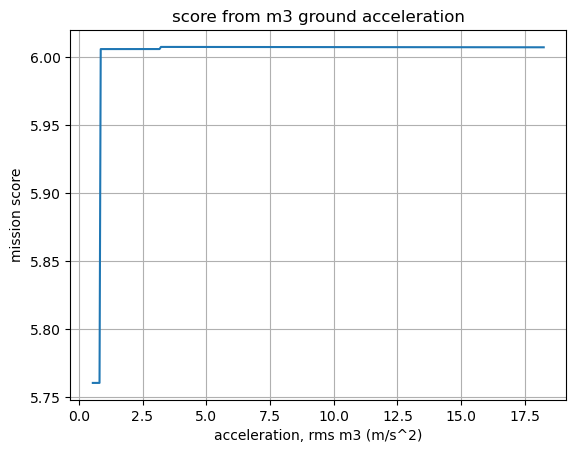

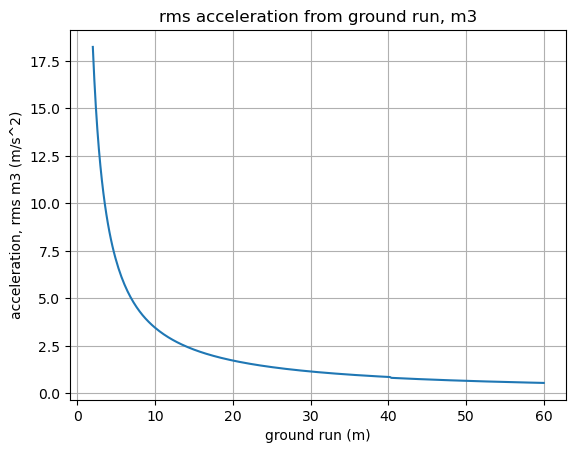

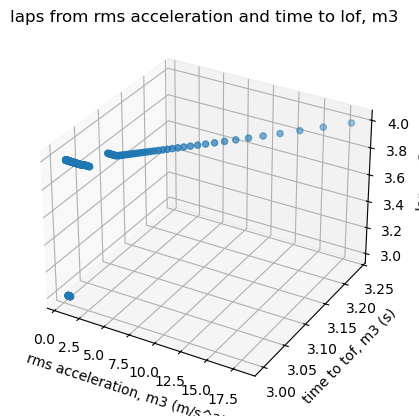

In [23]:
import yaml

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from aircraft.simple_plane import aircraft

class GroundRunSensitivity():
    """ class object to analyze sensitivity with carrying ground run"""
    def __init__(self):
        self.Sg = []
        self.accel_rms_m2 = []
        self.accel_rms_m3 = []
        self.P_shaft_lof_m2 = []
        self.P_shaft_lof_m3 = []
        self.E_m3 = []
        self.score = []
        self.mass_gross_m2 = []
        self.mass_gross_m3 = []
        self.laps_m2 = []
        self.laps_m3 = []
        self.time_tof_m3 = []

    def run_sim(self, Sg_arr):
        """ run sensitivity analysis with given range """
        for Sg in Sg_arr:
            conditions = {'altitude asl':397,'cruise altitude agl':10}
            aircraft_design_parameters = {'aspect ratio' : 3.644246,'wing span':1.524,'CLmax':0.85,'CDmin_no_fuselage':0.04,'fineness ratio':6,'m2 bank angle':0.96607, 'm3 bank angle': 0.5163}
            aircraft_design_parameters['conditions'] = conditions
            mission_parameters = {'cargo':1,'ducks':3,'mission two cruise speed': 16.587256,'banner length':8.3,'mission three cruise speed':12.510729,'banner aspect ratio':5}
            course_parameters = {'ground run': Sg,'time limit': 300,'length of straights': 304.8 }
            initial_guess = {'motor mass': 0.1,'m2 battery mass': 0.8,'m3 battery mass':0.5}

            temp_plane=aircraft(aircraft_design_parameters, mission_parameters, course_parameters, initial_guess, banner_data='docs/banner_data.yaml')

            with np.errstate(over='ignore', invalid='ignore'):  # don't log errors
                temp_plane.size_aircraft_all_missions()
            temp_plane.calculate_total_mission_score()
            self.Sg.append(Sg)
            self.accel_rms_m2.append((temp_plane.V_m2_tof/np.sqrt(2))**(2)/2/Sg)
            self.accel_rms_m3.append((temp_plane.V_m3_tof/np.sqrt(2))**(2)/2/Sg)
            # self.P_shaft_lof_m2.append(temp_plane.P_m2_tof_avail) 
            # self.P_shaft_lof_m3.append(temp_plane.P) 
            self.E_m3.append(temp_plane.E_battery_m3) 
            self.score.append(temp_plane.total_mission_score) 
            self.mass_gross_m2.append(temp_plane.mass_m2_gross) 
            self.mass_gross_m3.append(temp_plane.mass_m3_gross)
            self.laps_m2.append(temp_plane.laps_m2)
            self.laps_m3.append(temp_plane.laps_m3)
            self.time_tof_m3.append(temp_plane.time_m3_tof)
        
    def plot_ebatt_sg(self):
        """ plot energy from ground run distance """
        e = np.asarray(self.E_m3)
        sg = np.asarray(self.Sg)
        plt.figure()
        plt.plot(sg, e)
        plt.title('m3 batter energy from ground run')
        plt.xlabel('ground run (m)')
        plt.ylabel('energy batt, m3 (W*hr)')

    def plot_score_sg_mass(self):
        """ plot score from ground run and masses """
        sc = np.asarray(self.score)
        sg = np.asarray(self.Sg)
        m2 = np.asarray(self.mass_gross_m2)
        m3 = np.asarray(self.mass_gross_m3)
        plt.figure()
        ax = plt.gcf().add_subplot(111, projection='3d')
        sc = ax.scatter(m2, m3, sg, c=sc, cmap='magma')
        cb = plt.colorbar(sc, ax=ax, shrink=0.6, location='left')
        cb.set_label('mission score')
        ax.set_title('Mission score from ground run and gross mass')
        ax.set_xlabel('gross mass, m2 (kg)')
        ax.set_ylabel('gross mass, m3 (kg)')
        ax.set_zlabel('ground run (m)')

    def plot_score_sg(self):
        """ plot score from ground run only """
        sc = np.asarray(self.score)
        sg = np.asarray(self.Sg)
        plt.figure()
        plt.plot(sg, sc)
        plt.title('score from ground run')
        plt.xlabel('ground run (m)')
        plt.ylabel('mission score')

    def plot_score_accel_m3(self):
        """ plot score from rms acceleration only """
        sc = np.asarray(self.score)
        a = np.asarray(self.accel_rms_m3)
        plt.figure()
        plt.plot(a, sc)
        plt.title('score from m3 ground acceleration')
        plt.xlabel('acceleration, rms m3 (m/s^2)')
        plt.ylabel('mission score')

    def plot_accel_sg_m3(self):
        """ plot rms acceleration from ground run, m3 """
        sg = np.asarray(self.Sg)
        a = np.asarray(self.accel_rms_m3)
        plt.figure()
        plt.plot(sg, a)
        plt.title('rms acceleration from ground run, m3')
        plt.xlabel('ground run (m)')
        plt.ylabel('acceleration, rms m3 (m/s^2)')
    
    def plot_laps_accel_time_m3(self):
        """ plot laps form acceleration and time to tof"""
        l = np.asarray(self.laps_m3)
        ac = np.asarray(self.accel_rms_m3)
        t = np.asarray(self.mass_gross_m2)
        plt.figure()
        ax = plt.gcf().add_subplot(111, projection='3d')
        sc = ax.scatter(ac, t, l)
        ax.set_title('laps from rms acceleration and time to lof, m3')
        ax.set_xlabel('rms acceleration, m3 (m/s^2)')
        ax.set_ylabel('time to tof, m3 (s)')
        ax.set_zlabel('laps, m3')

sim = GroundRunSensitivity()
sim.run_sim(np.linspace(2, 60, 300))
sim.plot_ebatt_sg()
sim.plot_score_sg_mass()
sim.plot_score_sg()
sim.plot_score_accel_m3()
sim.plot_accel_sg_m3()
sim.plot_laps_accel_time_m3()
plt.show()


